# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [81]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    #print(data.head())
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
#print(data.head())

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [82]:
# Display a description of the dataset
display(data.describe())
#print(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [83]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#indices = [11,200,308,80,400,1,21,33,55,66]
indices = [33,66,75]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
#display(samples.describe())

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,29729,4786,7326,6130,361,1083
1,9,1534,7417,175,3468,27
2,20398,1137,3,4407,3,975


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
Sample 0 --> Is WholeFoods type Retailer, This sells large volume of Fresh, Milk , Grocery , Frozen and Delicatessen with low volume of Detergent Paper. This has 29729 of Fresh which is more than double the Fresh population mean of 12000, Frozen is 6130 which is almost double the population mean of Fresh 3071. Milk , Grocery and Delicatessen are close to the population mean which basically helps me to state that this is a retailer of Wholefood type dealing mainly in Fresh and Frozen with Milk , Grocery and Delicatessen are supporting products.

Sample 1 --> Is a Cafe  Store with low volume of Fresh, Frozen and Delicatessen and high on Milk, Grocery and Detergent Paper. This can be justified as Cafe as consumption of Milk is 1534 which is 25 percentile of population 1533 and Grocery of 7417 which is close to the population mean of 7951. Which means that this is a coffee shop consuming considerable amount of milk and serving cooked food means high level of Grocery. It also uses 3468 of detergent and paper which is higher than the population mean of 2881 means detergent is used for cleaning of dish and other utensils  paper is used by customers in the cafe in addition to wiping and drying of accessories

Sample 2 --> Panera or 99-Ranch(only Fresh) High on Fresh, Milk ,  Frozen and Delicatessen  low volume of Grocery  and Detergent Paper. This uses 20398 of Fresh which is little less than double of population mean 12000 and Frozen 4407 which is higher that the population mean of 3071. This basically helps to identify the sample as someone selling Fresh food as its main supported by Frozen items which might be cooked and serve. It has a less than 25% of population of Milk which menas that it uses 1137 of Milk product as Fresh food topping. It also serves some (975) Delicatessen as side items which is approximately 50% of the Delicatessen population. Based on this analysis I would consider this as a Panera type of shop

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [84]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
try:
    new_data = data.drop('Grocery', axis = 1, inplace = False)
    print("Data Without Grocery",new_data.head())
   
except:
    print "Grocery Column Cannot Be  Dropped"
    


X_features = new_data
y_target = data['Grocery']
#y_target = data['Delicatessen']
#y_target = data['Detergents_Paper']
#y_target = data['Frozen']
#y_target = data['Milk']
#y_target = data['Fresh']


print("Feature Minus Grogery ",X_features.head())
print ("Target Label Only Grocery ",y_target.head())

# TODO: Split the data into training and testing sets using the given feature as the target
#X_train, X_test, y_train, y_test = (None, None, None, None)
#X_train, X_test, y_train, y_test = train_test_split(X_features,y_target,test_size=0.25, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X_features,y_target,test_size=0.25, random_state=42) 

# TODO: Create a decision tree regressor and fit it to the training set
#regressor = DecisionTreeRegressor(random_state=42)
regressor = DecisionTreeRegressor(max_features="auto",splitter='best',random_state=42)

# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
score_param =  make_scorer(r2_score, greater_is_better=True)
grid = GridSearchCV(regressor, parameters,scoring=score_param)
grid = grid.fit(X_train, y_train)
pp = grid.predict(X_test)
score = r2_score(y_test,pp)
print('')
print("Score Using GridSearchCV:",score)
print('')
print("Predicted Values of Grocery at Index 33,66,75 are :")
print(np.round(pp[33]),np.round(pp[66]),np.round(pp[75]))
#[33,66,75]
regressor1 = regressor.fit(X_train, y_train)
pred = regressor1.predict(X_test)
score1 = r2_score(y_test,pred)
print('')
print("Score And Predicted Values of Grocery at Index 33,66,75 are -- Without GridSearchCV:")
print(score1,np.round(pred[33]),np.round(pred[66]),np.round(pred[75]) )

('Data Without Grocery',    Fresh  Milk  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     214              2674          1338
1   7057  9810    1762              3293          1776
2   6353  8808    2405              3516          7844
3  13265  1196    6404               507          1788
4  22615  5410    3915              1777          5185)
('Feature Minus Grogery ',    Fresh  Milk  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     214              2674          1338
1   7057  9810    1762              3293          1776
2   6353  8808    2405              3516          7844
3  13265  1196    6404               507          1788
4  22615  5410    3915              1777          5185)
('Target Label Only Grocery ', 0    7561
1    9568
2    7684
3    4221
4    7198
Name: Grocery, dtype: int64)

('Score Using GridSearchCV:', 0.70296390824364274)

Predicted Values of Grocery at Index 33,66,75 are :
(2316.0, 9477.0, 4634.0)

Score And Predicted Values of Grocery at Inde

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I have considered the Feature Grocery to predict. Grocery has been one of the main feature for Sample 0 (WholeFoods) and Sample 1 (Small Size Wallmart). The R^2 value is 0.703 (using the Gridsearch method) which implies that Grocery fits the model and is essential component.

Grocery has  coefficient of determination R^2 .703 which is close to one and thus Grocery can be mostly recovered from the remaining variables if dropped.

Other features like Fresh (0.1117), Frozen (-0.057) and   Delicatessen (-2.6464429841343442) have very low scores . This indicates that their information is unique and not contained in the other features, which is why I will keep them as these cannot be easily reconstructed. While Milk (0.412)Detergents_Paper (0.58009259784816281) has scores less than Grocery , thus Grocery can be best reconstructed.



### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

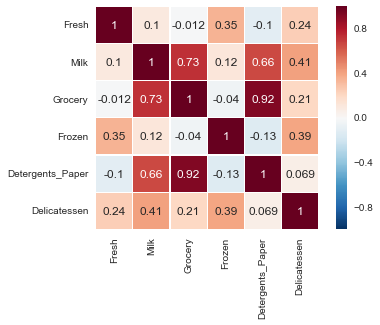

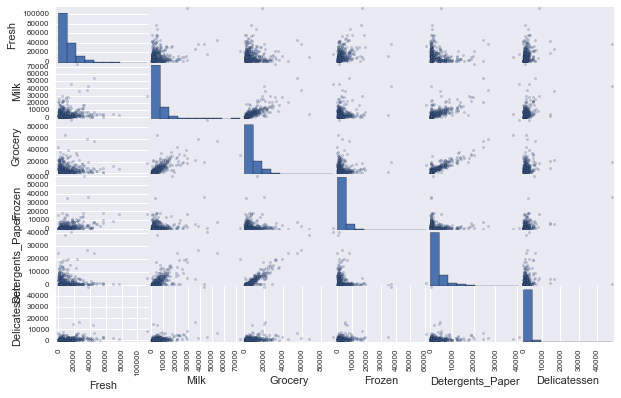

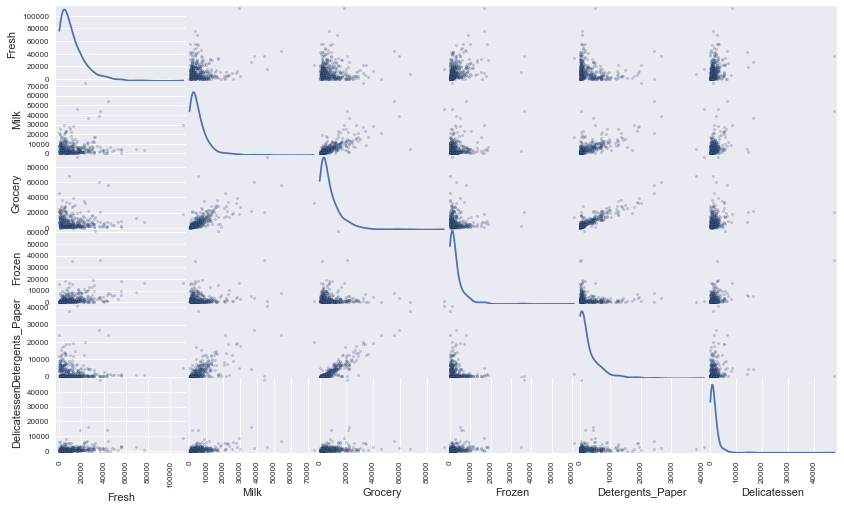

In [85]:
# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(samples, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
import seaborn as sns
corrmat = data.corr()
sns.heatmap(corrmat, vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot=True, annot_kws={"size":12})

pd.scatter_matrix(data, alpha = 0.3, figsize = (10,6));
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');






### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
There is a correlation between Grocery and DetergentPaper (0.92), Grocery and Milk has correlation of .73 , Milk and Detergent_Paper has correlation 0.66 in the given data set, I attempted to predict Grocery but using Grocery I cannot differentiate between Wholefood and WalMart. Data is not normally distributed and majority of the data reside between 0 and 15000 (positively skewed).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


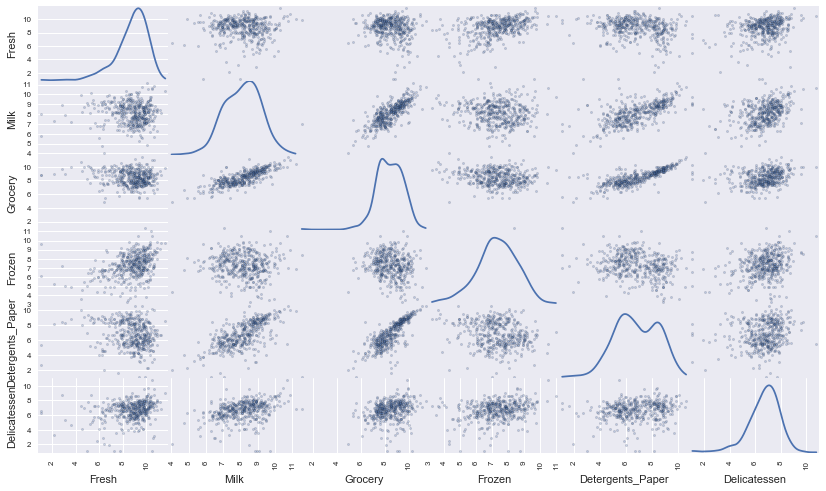

In [86]:
from scipy import stats
# TODO: Scale the data using the natural logarithm
log_data = None
#log_data = stats.boxcox(data)
log_data = np.log(data)
# TODO: Scale the sample data using the natural logarithm
log_samples = None
log_samples = np.log(samples)
# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
display(log_data.describe())

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.299878,8.473450,8.899185,8.720950,5.888878,6.987490
1,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
2,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,7.473432,7.615078,6.303109,7.425562,5.046275,5.721922
std,4.573209,0.758304,4.507231,1.964830,3.601070,2.101707
min,2.197225,7.036148,1.098612,5.164786,1.098612,3.295837
25%,6.060208,7.185891,4.998899,6.777868,3.493745,5.089137
50%,9.923192,7.335634,8.899185,8.390949,5.888878,6.882437
75%,10.111535,7.904542,8.905357,8.555950,7.020106,6.934964
max,10.299878,8.473450,8.911530,8.720950,8.151333,6.987490


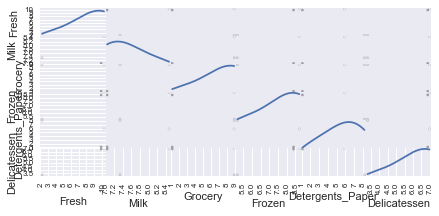

In [87]:
# Display the log-transformed sample data
display(log_samples)
display(log_samples.describe())
pd.scatter_matrix(log_samples, alpha = 0.3, figsize = (7,3), diagonal = 'kde');

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


('Original Data with Log converted :', (440, 6))
('Log Data After Removal of Outlier :', (398, 6))


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,8.933438,8.121251,8.418637,7.429215,6.787511,6.801190
std,1.116110,1.007751,1.011809,1.129943,1.610957,1.029976
min,5.541264,5.303305,5.407172,4.510860,1.609438,3.828641
25%,8.304866,7.376038,7.661527,6.721426,5.573103,6.105339
50%,9.116895,8.191878,8.427922,7.455588,6.669498,6.905249
75%,9.739143,8.825039,9.186270,8.228172,8.205335,7.512071
max,11.627601,10.901524,11.437986,10.463360,10.617099,9.712509


('Overlap :', [128, 154, 65, 66, 75])


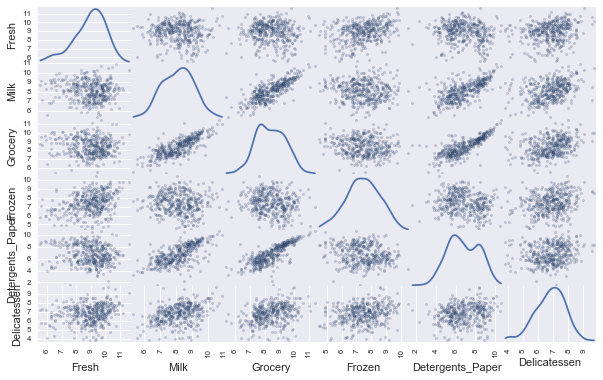

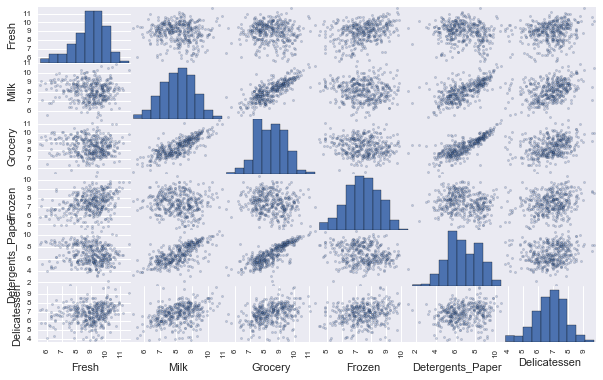

In [88]:
# For each feature find the data points with extreme high or low values
outlier1 =[]
outlier2 =[]
from collections import Counter
c = Counter()
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 =  np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 -Q1)*1.5
    #print(step,Q3,Q1)
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier1=([log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()])
    c.update(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)
    #print('')
    #print("outlier1 :",outlier1)
    #print('')
    outlier2 += outlier1
    #print("outlier2 :",outlier2)

# OPTIONAL: Select the indices for data points you wish to remove (this may contain duplicate index)
outliers_with_dup =[]
for i in range(0,len(outlier2)):
  outliers_with_dup =(outliers_with_dup + outlier2[i])
#print("With DUP :",outliers_with_dup)
"""
Now remove the duplicate index
"""
outliers = []
[outliers.append(item) for item in outliers_with_dup if item not in outliers]
# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
#good_data = log_data
#print('')
#print("outliers :",outliers)
#print('')
#xx = []
#print("Outlier Row",log_data.iloc[[65]])
#    #print ("Out", item,log_data)
#   xx.append(log_data.iloc[[item]])
#display("Outlier Data :",xx)
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Original Data with Log converted :",log_data.shape)
print("Log Data After Removal of Outlier :",good_data.shape)
#print("Gooddata :",good_data)
display(good_data.describe())
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (10,6), diagonal = 'kde');
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (10,6));
print ("Overlap :", [ o for o in c.keys() if c[o]>1])

In [89]:
from collections import Counter
c = Counter()
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature], 25)
    Q3 = np.percentile(log_data[feature], 75)
    step = (Q3 - Q1) * 1.5
    c.update(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)
print ("Overlap :", [ o for o in c.keys() if c[o]>1])

('Overlap :', [128, 154, 65, 66, 75])


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
Yes data point at index 65 is outlier for Frozen and Fresh, at index 75 is outlier for Grocery and detergent paper, at index 128 is outlier for delicatessen, at index 154 is common outlier for Milk, Grocery and Delicatessen , at index 66 is outlier Fresh and delicatessen. These datapoints I have added in the outlier list . Considering all 6 features I have added 42 datapoint as outlier , the calculation of outlier is based on IQR *1.5 . I have removed these outlier so that the good data set is not skewed and to a have more standarized mean and standard deviation. In the scatter matrix plot you can see the distribution is more normal.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained Variance Good data :
[ 0.49930484  0.22594807  0.10488309  0.09781761  0.04879109  0.0232553 ]

PCA Component of Good data 
[[-0.09758688  0.41085006  0.45111781 -0.12804262  0.75951245  0.15785331]
 [ 0.60077834  0.1369893   0.08516261  0.62996118 -0.03761194  0.46344461]
 [ 0.74520543 -0.15440822  0.02038937 -0.26695167  0.23485013 -0.54221164]
 [-0.26670888 -0.13749532 -0.0709773   0.71328102  0.31568384 -0.54451588]
 [ 0.0114087   0.70825884  0.31682301  0.06711674 -0.47290085 -0.41197399]
 [ 0.05428877  0.51774387 -0.82668599 -0.04707807  0.20803866  0.00937317]]




'LOG SAMPLES:'

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.299878,8.473450,8.899185,8.720950,5.888878,6.987490
1,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
2,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


PCA_SAMPLE is transformed log samples using pca fitted on good data :
[[-0.59037353  1.84398219  0.31680541  0.08926732  0.85219729 -0.38674764]
 [ 1.32940019 -7.21495145 -2.06307693  2.59372539  0.17006918 -0.82244052]
 [-8.2757019   0.68006271 -0.8809602  -0.74937096 -0.35503164  4.31526313]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,8.933438,8.121251,8.418637,7.429215,6.787511,6.801190
std,1.116110,1.007751,1.011809,1.129943,1.610957,1.029976
min,5.541264,5.303305,5.407172,4.510860,1.609438,3.828641
25%,8.304866,7.376038,7.661527,6.721426,5.573103,6.105339
50%,9.116895,8.191878,8.427922,7.455588,6.669498,6.905249
75%,9.739143,8.825039,9.186270,8.228172,8.205335,7.512071
max,11.627601,10.901524,11.437986,10.463360,10.617099,9.712509


Graph Good data
('CUMM SUM Explained Variance Good data :', array([ 0.49930484,  0.7252529 ,  0.83013599,  0.92795361,  0.9767447 ,  1.        ]))


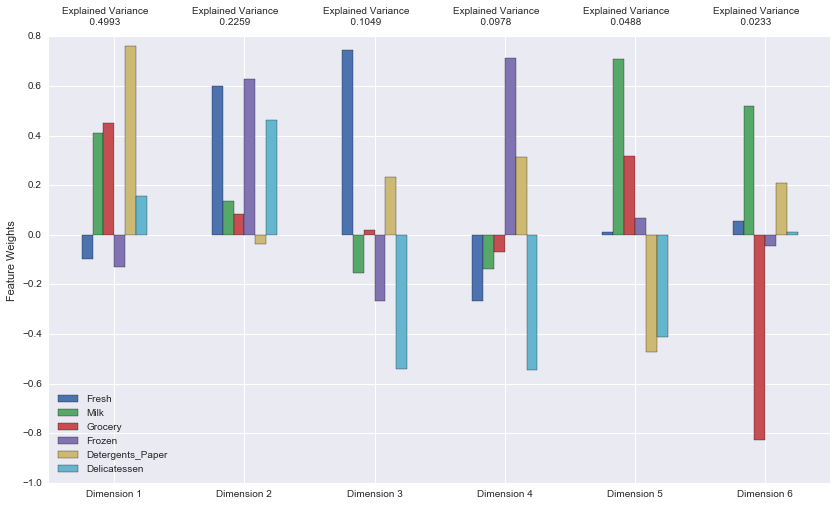

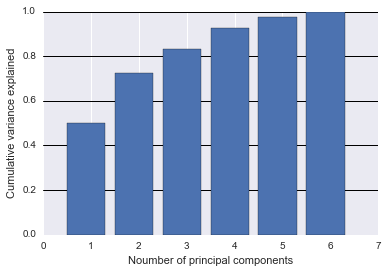

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#import numpy as np
from pylab import *
n_components =6

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=n_components).fit(good_data)
#pca_good_data_transform = pca.transform(good_data)
#print("PCA :",pca)

#pca_log_data = PCA(n_components=n_components).fit(log_data)
#pca_log_data_transform = pca.transform(log_data)

print("Explained Variance Good data :")
print(pca.explained_variance_ratio_)


#print('')
#print("Explained Variance Log Data:",pca_log_data.explained_variance_ratio_)
print('')
print("PCA Component of Good data ")
print(pca.components_)
#print("CUMM SUM PCA Component Good data ",pca.components_.cumsum())
print('')
#print(pca_results)
#print("PCA Component Log Data",pca_log_data.components_)
print('')



# TODO: Apply a PCA transformation to the sample log-data
display("LOG SAMPLES:",log_samples)
pca_samples = pca.transform(log_samples)
print("PCA_SAMPLE is transformed log samples using pca fitted on good data :")
print(pca_samples)

display(good_data.describe())
# Generate PCA results plot
print ("Graph Good data")
#pca_results = rs.pca_results(good_data, pca)
#rs.pca_results(good_data, pca)
#print ("Graph Log data")
#pca_results_log_data = rs.pca_results(log_data, pca_log_data)
pca_results = rs.pca_results(good_data, pca)
#plt.figure(figsize = (10, 3))
fig, ax = plt.subplots()
#plt.subplot(222)
plt.bar( np.arange(n_components)+.5,pca.explained_variance_ratio_.cumsum())
plt.ylim((0, 1))
plt.xlabel('Noumber of principal components')
plt.ylabel('Cumulative variance explained')
plt.grid(axis = 'y', ls = '-', lw = 1, color = 'black')
print("CUMM SUM Explained Variance Good data :",pca.explained_variance_ratio_.cumsum())
#fig, ay = plt.subplots()
#plt.bar( np.arange(36)+.5,pca.components_.cumsum())




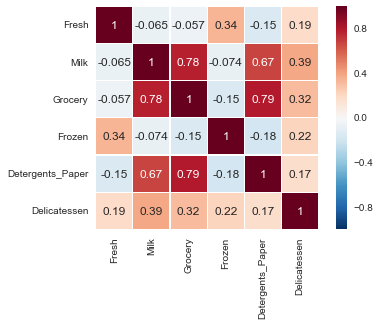

In [91]:
corrmat1 = good_data.corr()
sns.heatmap(corrmat1, vmin=corrmat1.values.min(), vmax=1, square=True, linewidths=0.1, annot=True, annot_kws={"size":12})


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
The cummulative vaiance explained by first and second principal component is 0.7252529 . The first four PCA has a cummulative variane explained of 0.92795361.

PCA Dimension 1: There is a positive correlation between milk , grocery , detergent and delicatessen. This customer segment is similar to the Cafe Store with more emphasis on buying milk , grocery , detergent and delicatessen and less on buying fresh and frozen. Maximum positive weightage on detergent and least positive weightage on delicatessen

PCA Dimension 2:There is a positive correlation between Fresh, milk , grocery , frozen and delicatessen . This Customer segement aligns with the WholeFood retailers having emphasis on buying Fresh, milk , grocery , frozen and delicatessen with less on detergent. Maximum positive weightage on frozed, fresh followed by delicatessen and least positive weightage on grocerry.

PCA Dimension 3:There is a positive correlation between Fresh, grocery detergent.With high on Fresh the Customer segment is close to Parena type of segement  interested in buying Fresh, grocery detergent. Maximum positive weightage on  fresh  and least positive weightage on grocerry.

PCA Dimension 4:There is a positive correlation between frozen, detergent. Customer interested in buying frozen, detergent. With significant positive weight on Frozen followed by detergent and significant negative weight on Delicatessen this dimension can be described as characteristic of spending on of-the-shelf Frozen goods or closely related to Panera types with main emphasis on Frozen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [92]:
# Display sample log-data after having a PCA transformation applied

display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.5904,1.8440,0.3168,0.0893,0.8522,-0.3867
1,1.3294,-7.2150,-2.0631,2.5937,0.1701,-0.8224
2,-8.2757,0.6801,-0.8810,-0.7494,-0.3550,4.3153


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

PCA(copy=True, n_components=2, whiten=False)
Reduced Data :
   Dimension 1  Dimension 2
0     1.779322    -0.660449
1     1.882034     0.461741
2     1.993507     1.247080
3    -0.998581     1.369364
4     0.993847     2.078314
('CUMM SUM Explained Variance Good data :', array([ 0.49930484,  0.7252529 ]))
PCA Results


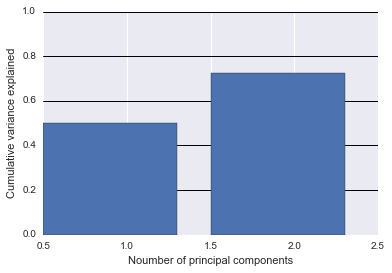

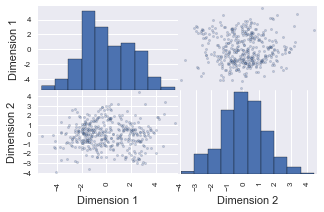

In [93]:
# TODO: Fit PCA to the good data using only two dimensions
#pca =  PCA(n_components=2).fit(good_data[["Grocery","Detergents_Paper"]])
n_components =2
pca =  PCA(n_components=n_components).fit(good_data)

print (pca)


# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)


#print(reduced_data)
#print(log_samples.head())

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

print("Reduced Data :")
print(reduced_data.head())

fig, ax = plt.subplots()
#plt.subplot(222)
plt.bar( np.arange(n_components)+.5,pca.explained_variance_ratio_.cumsum())
plt.ylim((0, 1))
plt.xlabel('Noumber of principal components')
plt.ylabel('Cumulative variance explained')
plt.grid(axis = 'y', ls = '-', lw = 1, color = 'black')
print("CUMM SUM Explained Variance Good data :",pca.explained_variance_ratio_.cumsum())
print("PCA Results")

pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (5,3));


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [94]:
# Display sample log-data after applying PCA transformation in two dimensions
#display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))


,Dimension 1,Dimension 2
0,-0.5904,1.8440
1,1.3294,-7.2150
2,-8.2757,0.6801


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
Advantages of K-Means clustering:
1. k-means is one of the simplest algorithm which uses unsupervised learning method to solve known clustering issues.
2. Computationally faster and cheaper to train for large datasets and data with large number of variables
3. k-Means is a special case of Gaussian Mixture Model, such that the probability of a one point to belong to a certain cluster is 1, and all other probabilities are 0, and the variance is 1, k-Means produces only spherical clusters.

Advantages of Gaussian Mixture Model(GMM) clustering:
1. GMM is good for models having hidden parameters. This is because, this algorithm is assigning a probability to each point to belong to certain cluster, instead of assigning a flag that the point belongs to certain cluster as in the classical k-Means.

2. GMM is producing non-convex clusters, by estimating the co-variance.

3. GMM models the co-variance of the clusters and thus produces  elliptical clusters,GMM cannot handle non-convex clusters it can  only handle elliptical clusters.

Due to simplicity and fast execution I will use K-Means 


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn import mixture
n_components =2
cv_type =  'full'
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = None
clusterer = KMeans(n_clusters=n_components, random_state=10)

#clusterer =  mixture.GMM(n_components=n_components, covariance_type=cv_type)

# TODO: Predict the cluster for each data point
preds = None
preds = clusterer.fit_predict(reduced_data)
#clusterer = clusterer.fit(reduced_data)
#preds = clusterer.predict(reduced_data)

print("Predict :",preds)
print('')
# TODO: Find the cluster centers
centers = None
centers  = clusterer.cluster_centers_ 

print ("Dim1  & Dim 2 Center :",centers)
print('')

# TODO: Predict the cluster for each transformed sample data point
sample_preds = None
#sample_preds_fit = clusterer.fit(pca_samples)
#sample_preds =sample_preds_fit.predict(pca_samples)
sample_preds =clusterer.fit_predict(pca_samples)
print("Sample Predict ",sample_preds)
print('')
#sample_preds = silhouette_samples(reduced_data, preds)

#print("Sample Pred:",sample_preds)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = None
score = silhouette_score(reduced_data, preds)
print ("Mean Silhouette Coefficient of Dim 1 and Dim2:",score)
print('')
print("Mean Silhouette Coefficient of Sample ",silhouette_score(pca_samples, sample_preds))


('Predict :', array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1

In [96]:
# GMM Self Test DO NOT Consider For Grading
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn import mixture
n_components =2
cv_type =  'full'
clusterer1 =  mixture.GMM(n_components=n_components, covariance_type=cv_type)
preds1 = clusterer1.fit_predict(reduced_data)
#clusterer = clusterer.fit(reduced_data)
#preds = clusterer.predict(reduced_data)
centers1  = clusterer1.means_ 

covars  = clusterer1.covars_
print ("Dim1  & Dim 2 Center :",centers1)
print('')
print("Predict :",preds1)
print('')
#clusterer.fit()
sample_preds1 =clusterer1.fit_predict(pca_samples)
print("Sample Predict ",sample_preds1)
print('')
score1 = silhouette_score(reduced_data, preds1)
print ("Mean Silhouette Coefficient of Dim 1 and Dim2:",score1)
print('')
print("Mean Silhouette Coefficient of Sample ",silhouette_score(pca_samples, sample_preds1))

('Dim1  & Dim 2 Center :', array([[-1.38146225,  0.17854543],
       [ 1.80541812, -0.2333391 ]]))

('Predict :', array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

2 Clusters =='Mean Silhouette Coefficient of Dim 1 and Dim2:', 0.447157742293467

3 Clusters == 'Mean Silhouette Coefficient of Dim 1 and Dim2:', 0.3639864798401739

4 Clusters == 'Mean Silhouette Coefficient of Dim 1 and Dim2:', 0.33115095428456565

5 Clusters == 'Mean Silhouette Coefficient of Dim 1 and Dim2:', 0.35227346043966828

6 Clusters == 'Mean Silhouette Coefficient of Dim 1 and Dim2:', 0.36276101512674497

7 Clusters == 'Mean Silhouette Coefficient of Dim 1 and Dim2:', 0.35449626975638115

8 Clusters == 'Mean Silhouette Coefficient of Dim 1 and Dim2:', 0.37722920439053548



### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

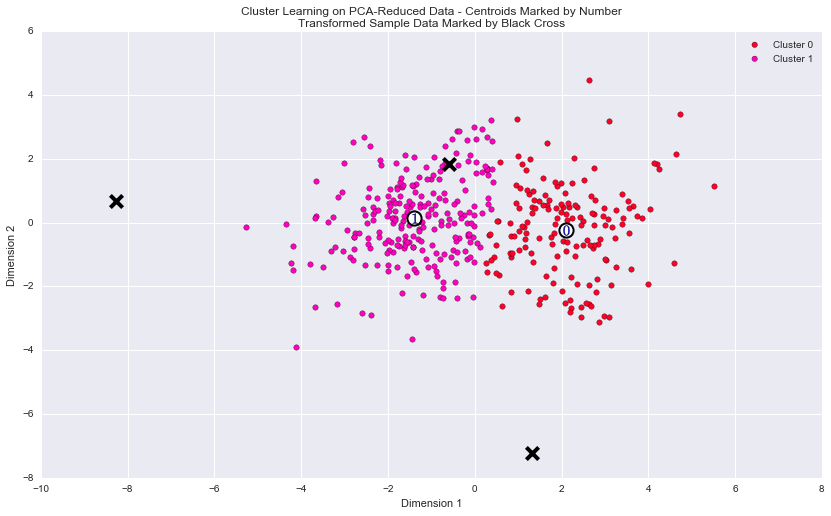

In [101]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)



### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [103]:
# TODO: Inverse transform the centers
log_centers =  pca.inverse_transform(centers)
#log_centers =  pca.inverse_transform(reduced_data)
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
#print(data.keys()[:3])
print(" Log Center ")
print(log_centers)
print('')
print("True Center ")
print(true_centers)
print('')
# Display the true centers


segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
#print(segments)
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
#print(segments)



 Log Center 
[[ 8.59862529  8.95935377  9.352869    7.02384337  8.39920005  7.03514731]
 [ 9.15385615  7.56949933  7.80360017  7.69608444  5.72648239  6.64716857]]

True Center 
[[  5424.19778156   7780.32799336  11531.86089437   1123.09480755
    4443.51073162   1135.86222037]
 [  9450.81398866   1938.16965459   2449.40439917   2199.71797803
     306.88785424    770.59933661]]



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Segment 0 has resemblence to Cafe:
It has Milk 7780 , Grocery 11532 and Detergents_Paper 4444 which is higher than the population mean of 5796, 7951 and 2881 respectivelly . Frozen 1123 and Delicatessen 1136 are close to 50% percentile of the population.
This Cafe uses considerable amount of milk for products like coffee, tea, shakes etc and uses Grocery products for serving fresh cooked food. Detergent and paper are used by both cafe guests and staff including cleaning and wiping.


Segment 1 has resemblence to Panera
It has Fresh 9451 and Frozen 2200 which is higher than 50% and less that mean of population, Milk 1938 and Grocery 2449 is close to 25 percentile of population. Basically its selling Fresh supported by Frozen and uses Milk as toppings etc and uses Grocery serve some amount of cooked food.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [109]:
# Display the predictions
print(sample_preds)
#display(np.exp(pca.inverse_transform(pca_samples)))
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
print('')
#for i, pred in enumerate(true_centers):
#    print "Sample point", i, "predicted to be in Cluster", pred

[1 0 1]
Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1



**Answer:**
Sample point 0 resemblence to Panera, however my original consideration was WholeFood/Retiler thus not in line with cluster


Sample point 1 resemblence to Cafe, and my original consideration was cafe and thus prediction is consistent.

Sample point 2 resemblence to Panera, and my original consideration was Panera  and thus prediction is consistent.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**
In both segments we see that Fresh, Milk , Frozen and Grocery are higher in volume , in segment 0 Detergents_Paper and 
Delicatessen is also higher (Detergent is higher than Delicatessen) but for Segment 1 Delicatessen is higher than Detergent .

Fresh and Frozen is almost double in Segment1 than Segment 0 

Grocery and Detergent is way higher in Segment 0 than Segment 1

Segment 0 is cafe type and has Milk 7780 , Grocery 11532 and Detergents_Paper 4444 which is higher than the population mean  Segment 1 is Panera type and has Fresh 9451 and Frozen 2200 which is higher than 50% and less that mean of population

My idea is to sample customer from each cluster and compare the output of 3 days service with 5 days service for the same time period and size.


Distributor can perform A/B test by selecting a random sample from each cluster and reducing the delivery frequency for each of them to 3 days a week. Collect one week data for this selected sample and evaluate and compare with the  results with equally sized controlled group selected from the remaining sample for the same time period. Repeat the test with multiple random samples from each cluster and compare the output. If the output for the selected sample is is same or higher then the distributor can switch from 5 days to 3 days a week.


### Question 11
*Assume the wholesale distributor wanted to predict some other feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*

**Answer:**
Wholesale distributor can predict some other feature for each customer based on the purchasing information available by using clustering technique. Based on   each customer’s estimates for anticipated annual spending (purchasing information) of each product category the wholesale distributor can classify each customer to a customer segment.
A supervised learning algorithm can be used to distinguish between clusters and can interpret the cluster assignments as labels for a supervised learning algorithm. 



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

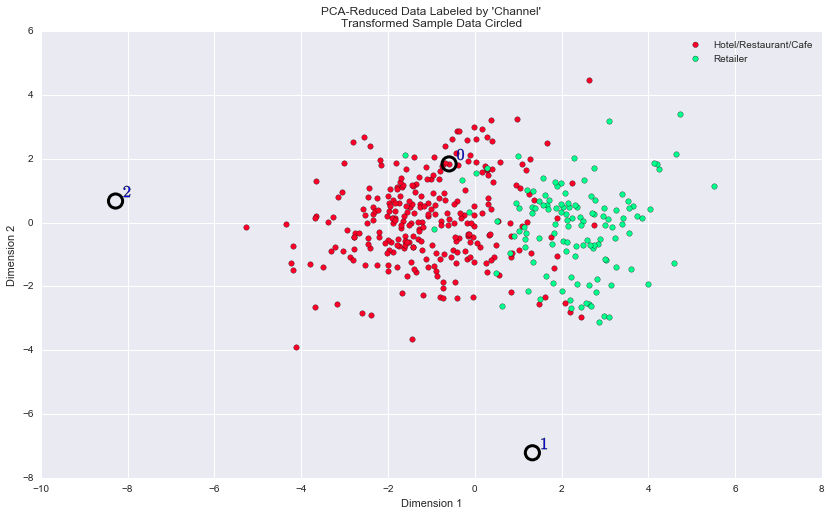

In [111]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)



### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The number of clusters choosen by me are same as that of "Hotel/Restaurant/Cafe customers to Retailer customers" that is 2. Distribution and centers seems to be similar.

Very small section of customers can be classified as pure Hotel/Restaurant/Cafe or pure  Retailers (unless you remove the outliers from channel).

These classifications are similar to the previous but can be made more consistent if outliers are excluded.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.